In [43]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data - etude de cas.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
# The dataset is composed 10 886 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
# The dataset is composed of numerical features excpect for the datetime column, there is no missing values.

In [7]:
# Let's trasnform datetime type into datetime type
df.datetime = pd.to_datetime(df.datetime)

In [8]:
df.datetime.dtypes

dtype('<M8[ns]')

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# There are no duplicated values within the dataset

In [12]:
# There are no missing values in the dataset

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# Now we want to identify at what hour and weekday each row corresponds

In [15]:
df["hour"] = df.datetime.dt.hour

In [16]:
df["weekday"] = df.datetime.dt.weekday

In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


In [18]:
df = df.sort_values("datetime")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


In [19]:
#plt.figure(figsize=(6,8))
#sns.countplot(x="count", data=df, hue="casual")
#plt.show()

In [20]:
casual_df = df.loc[df.casual]
registered_df = df.loc[df.registered]

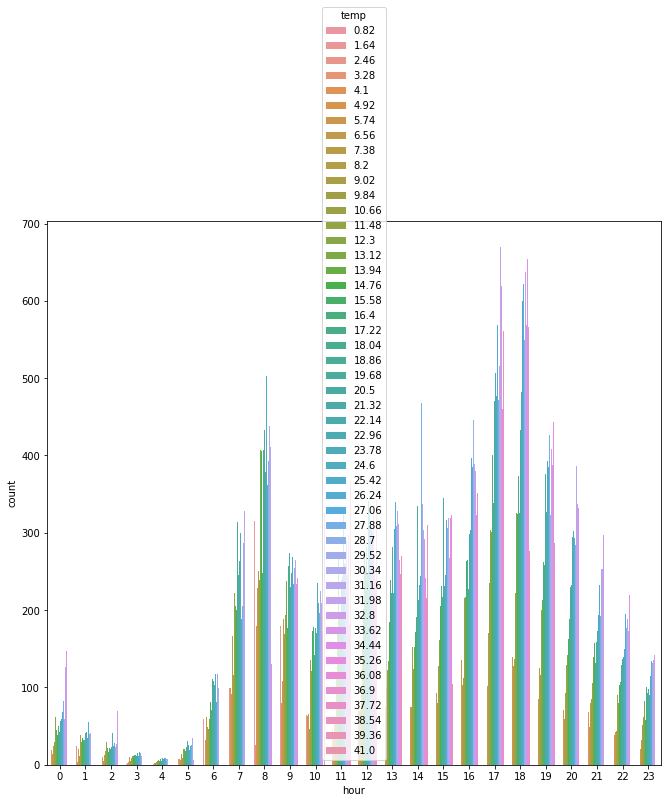

In [59]:
plt.figure(figsize=(11,10))
sns.barplot('hour','count', data=df, ci=None, hue="temp")

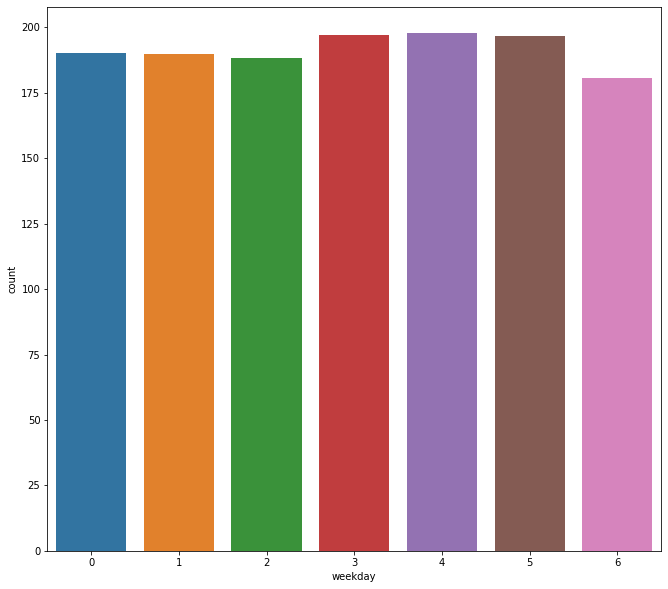

In [58]:
plt.figure(figsize=(11,10))
sns.barplot('weekday','count', data=df, ci=None)

<Figure size 720x720 with 0 Axes>

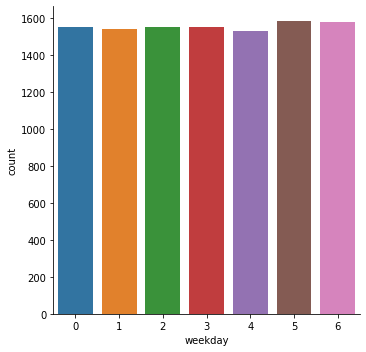

In [21]:
plt.figure(figsize=(10,10))
sns.catplot(x="weekday", data=df, kind="count", hue="")
plt.show()

In [22]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


In [23]:
df_pivot = round(df.pivot_table(index="hour", columns="weekday", values="count"))
df_pivot.head(24)

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,35.0,27.0,36.0,37.0,53.0,98.0,96.0
1,18.0,12.0,16.0,15.0,24.0,70.0,79.0
2,11.0,6.0,8.0,8.0,13.0,50.0,62.0
3,6.0,4.0,5.0,5.0,6.0,23.0,30.0
4,6.0,5.0,5.0,5.0,6.0,8.0,10.0
5,22.0,24.0,25.0,26.0,23.0,9.0,9.0
6,89.0,105.0,106.0,108.0,91.0,21.0,15.0
7,260.0,298.0,297.0,308.0,254.0,47.0,35.0
8,428.0,469.0,485.0,497.0,470.0,118.0,84.0


In [26]:
# Let's split our dataset into X and y

X = df.drop(["casual", "registered", "count", "datetime"], axis=1)
y = df["count"]
X.shape, y.shape

((10886, 10), (10886,))

In [30]:
# let's use Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

/Users/louisdreyfus/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
y_pred

array([171.5,  32.1, 161.3, ..., 418.3,   5.6, 199.4])

In [51]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(rf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
print(np.median(scores) * -1)

27.099999999999994


In [57]:
df["test"] = df.casual / df.count

AssertionError: <class 'method'>